In [2]:
import glob
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import cm

## Auction agent performance as function of $R_d$

In [48]:
folders = glob.glob("./data/auction_*")
Rd = [int(folder[-4:]) for folder in folders]
files = {}
for i, folder in enumerate(folders):
    files[Rd[i]] = glob.glob(folders[i] + "/*.txt")

In [49]:
data = {}
for key in files:
    data[key] = []
    for file in files[key]:
        data[key].append(np.loadtxt(file))

In [50]:
pastel_cmap = cm.get_cmap("Pastel2")

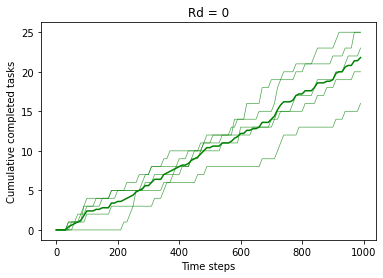

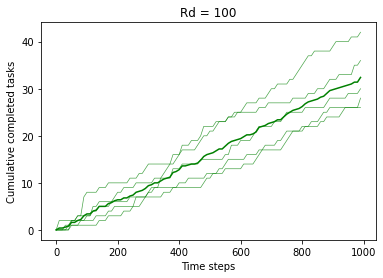

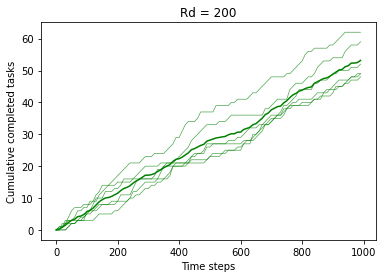

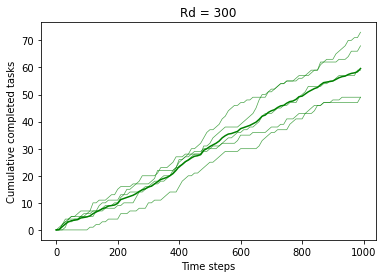

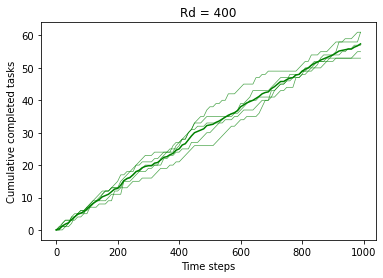

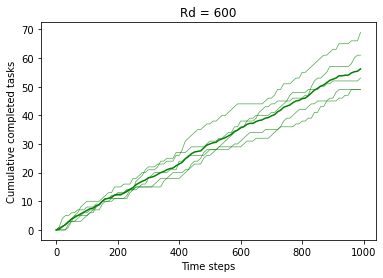

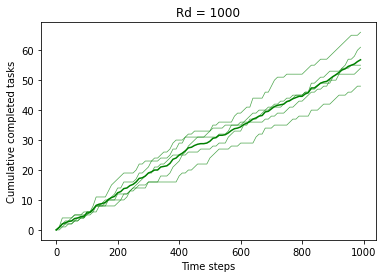

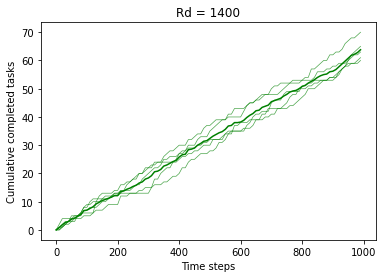

In [68]:
means = []
stds = []
for Rd_ in sorted(Rd):
    some_data = data[Rd_]
    n = len(some_data)
    numpy_data_array = np.zeros((n, len(some_data[0][:,0])))
    plt.figure()
    for i in range(n):
        numpy_data_array[i, :] += some_data[i][:,1]
        plt.plot(
            some_data[i][:,0],
            some_data[i][:,1],
            color="green",
            alpha=0.7,
            linewidth=0.7,
        )
    means.append(np.mean(numpy_data_array[:, -1]))
    stds.append(np.std(numpy_data_array[:, -1]))
    plt.plot(
        some_data[0][:,0],
        np.mean(numpy_data_array, axis=0),
        color="green",
        alpha=1,
        linewidth=1.5,
    )
    plt.title(f"Rd = {Rd_}")
    plt.xlabel("Time steps")
    plt.ylabel("Cumulative completed tasks")
    plt.savefig(f"Rd_{Rd_}.png", dpi=150)
plt.show()

In [69]:
means

[21.8, 32.4, 53.166666666666664, 59.6, 57.4, 56.2, 56.8, 63.8]

In [70]:
stds

[3.4292856398964493,
 5.851495535331117,
 5.398044913567215,
 9.748846085563153,
 3.2,
 7.756287771866126,
 6.1773780845922,
 3.54400902933387]

## Comparison from last time

In [6]:
auction_folders = glob.glob("./data/auction_*")
regular_folders = glob.glob("./data/regular_*")
Rd_auc = [int(auction_folder[-4:]) for auction_folder in auction_folders]
Rd_reg = [int(regular_folder[-4:]) for regular_folder in regular_folders]
auc_files = {}
reg_files = {}

for i, folder in enumerate(auction_folders):
    auc_files[Rd_auc[i]] = glob.glob(auction_folders[i] + "/*.txt")

for i, folder in enumerate(regular_folders):
    reg_files[Rd_reg[i]] = glob.glob(regular_folders[i] + "/*.txt")

In [7]:
auc_data = {}
for key in auc_files:
    auc_data[key] = []
    for file in auc_files[key]:
        auc_data[key].append(np.loadtxt(file))

reg_data = {}
for key in reg_files:
    reg_data[key] = []
    for file in reg_files[key]:
        reg_data[key].append(np.loadtxt(file))

In [12]:
auc_means = []
auc_stds = []

for Rd_ in sorted(Rd_auc):
    some_data = auc_data[Rd_]
    n = len(some_data)
    numpy_data_array = np.zeros((n, len(some_data[0][:,0])))
    for i in range(n):
        numpy_data_array[i, :] += some_data[i][:,1]
    auc_means.append(np.mean(numpy_data_array[:, -1]))
    auc_stds.append(np.std(numpy_data_array[:, -1]))
    
reg_means = []
reg_stds = []

for Rd_ in sorted(Rd_reg):
    some_data = reg_data[Rd_]
    n = len(some_data)
    numpy_data_array = np.zeros((n, len(some_data[0][:,0])))
    for i in range(n):
        numpy_data_array[i, :] += some_data[i][:,1]
    reg_means.append(np.mean(numpy_data_array[:, -1]))
    reg_stds.append(np.std(numpy_data_array[:, -1]))

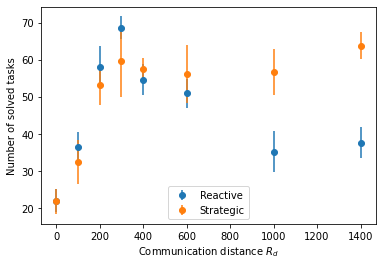

In [18]:
plt.errorbar(
    sorted(Rd_reg),
    reg_means,
    yerr=reg_stds,
    fmt="o",
    label="Reactive",
)
plt.errorbar(
    sorted(Rd_auc),
    auc_means,
    yerr=auc_stds,
    fmt="o",
    label="Strategic",
)
plt.legend(loc="lower center")
plt.xlabel("Communication distance $R_d$")
plt.ylabel("Number of solved tasks")
plt.savefig("perf_compare.png", dpi=200)
plt.show()